# Transit Classification - Basics 

- Introduce the dataset
- Classification with unbalanced classes
- Task break down 

## Introduce the dataset

### What is the training data? 
This is the first important question to ask. 
Roughly speaking, there are two type of approaches:
- real world data
- simulated data

There are pros and cons for both approaches, for example, with simulated data, we know the **Truth** of our training set; however, with real world data, we are training on something closer to what we are expect to test the method on.

Today we will not worry about the choose of dataset. I would first like you to get your hands dirty by examine the real world data.

You can find the data for today here: 

These are ~30 day segments of light curves observed by a CCD on the Kepler Spacecraft. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
#load the dataset, introduce the structure
data=pd.read_csv("data/kepler_q1_sgn21.csv")
data.head()

,Transit,Name
0,0,kplr007349773
1,0,kplr007349868
2,0,kplr007349958
3,0,kplr007350025
4,0,kplr007431521


(array([ 738.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   13.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

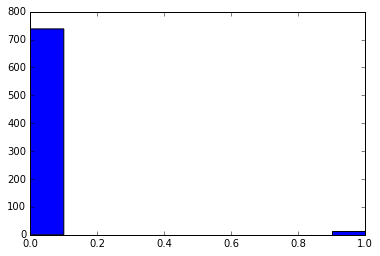

In [11]:
plt.hist(data['Transit'])

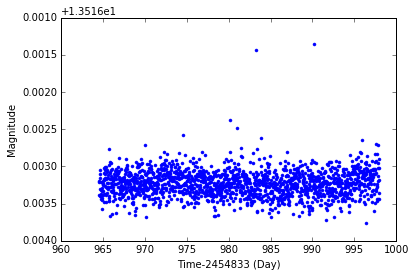

In [49]:
#show how to plot a light curve
lc = np.loadtxt("data/kplr007349773-2009166043257_llc.tab")
#lc = np.loadtxt("data/kplr007431833-2009166043257_llc.tab")
#lc = np.loadtxt("data/kplr007672940-2009166043257_llc.tab")
#lc = np.loadtxt("data/kplr007810483-2009166043257_llc.tab")
#plt.plot(lc[:,0],lc[:,1],'.')
plt.plot(lc[:,0],lc[:,3],'.')
plt.ylabel("Magnitude")
plt.xlabel("Time-2454833 (Day)")
plt.gca().invert_yaxis()
plt.show()

## Classification problem with Unbalanced classes

We notice above that in our dataset, the amount of data in the two classes are extremely unbalanced. 
13 Trues and 738 Falses. 
Accuracy of the classification can no longer be a good criterial for our algorithm. 

If predict False for every object, you can easily achieve 98.2% accuracy. 

Instead, we want to look at the confusion metrix. 

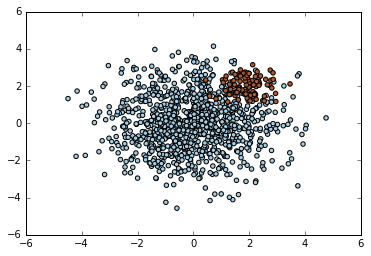

In [12]:

# we create 40 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

Confusion matrix, without normalization
[[234   9]
 [ 11  21]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.34  0.66]]


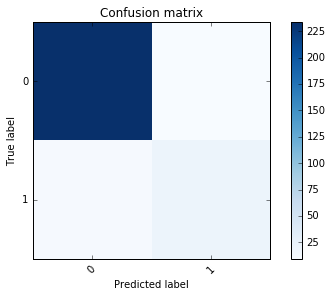

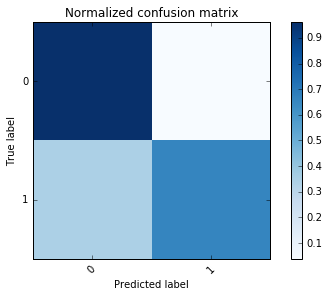

In [37]:

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=1)
#classifier = svm.SVC(kernel='linear', C=1,class_weight={1: 10})
y_pred = classifier.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0","1"], rotation=45)
    plt.yticks(tick_marks, ["0","1"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

**Precision, Recall and F measures**: 
Read More: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#example-model-selection-plot-precision-recall-py

0.7 0.65625 0.677419354839
0.551724137931 1.0 0.711111111111


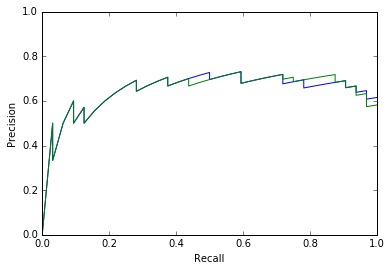

In [38]:
from sklearn.metrics import precision_recall_curve, precision_score,recall_score,f1_score
classifier = svm.SVC(kernel='linear', C=1)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_pred = classifier.fit(X_train, y_train).predict(X_test)
print precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)
precision, recall, _ = precision_recall_curve(y_test,y_score)
plt.plot(recall,precision)
classifier = svm.SVC(kernel='linear', C=1,class_weight={1: 10})

y_score2 = classifier.fit(X_train, y_train).decision_function(X_test)

y_pred2 = classifier.fit(X_train, y_train).predict(X_test)
print precision_score(y_test,y_pred2), recall_score(y_test,y_pred2),f1_score(y_test,y_pred2)

precision2, recall2, _ = precision_recall_curve(y_test,y_score2)
plt.plot(recall2,precision2)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

## Task Break Down

- select/generate traning set
    - generate target for more Kepler CCDs using NASA exoplanet archive. 
    - decide a hold out set. 
    - decide how many classes to classify. 
- feature engeneering 
    - run BLS algorithm to generate spectra, and generate features from the spectra. 
    - using the most dominant peaks of the spectra to calculate possible transit parameters. 
    - calculate other features of the light curve: short term variability, long term variability. 
    - or many other possibilities... 
- algorithm test/tuning 
    - select the algorithms to try out. 
    - build cross validation frame work. 
    - feature selection. 
    - PCA. 
    - feed back to the other parts. 